**EMPLOYEE BURNOUT PREDICTION**

**IMPORTING LIBRARIES**

In [ ]:
mport numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR,SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import pickle

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("employee_burnout_analysis-AI.csv")

In [ ]:
data.head()

Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200       9/30/2008  Female      Service   
1      fffe3700360033003500      11/30/2008    Male      Service   
2  fffe31003300320037003900       3/10/2008  Female      Product   
3  fffe32003400380032003900       11/3/2008    Male      Service   
4  fffe31003900340031003600       7/24/2008  Female      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No            2                  3.0                   3.8   
1                 Yes            1                  2.0                   5.0   
2                 Yes            2                  NaN                   5.8   
3                 Yes            1                  1.0                   2.6   
4                  No            3                  7.0                   6.9   

   Burn Rate  
0       0.16  
1       0.36  
2       0.49  
3       0.20  
4       0.52

In [ ]:
data.describe()

Designation  Resource Allocation  Mental Fatigue Score     Burn Rate
count  22750.000000         21369.000000          20633.000000  21626.000000
mean       2.178725             4.481398              5.728188      0.452005
std        1.135145             2.047211              1.920839      0.198226
min        0.000000             1.000000              0.000000      0.000000
25%        1.000000             3.000000              4.600000      0.310000
50%        2.000000             4.000000              5.900000      0.450000
75%        3.000000             6.000000              7.100000      0.590000
max        5.000000            10.000000             10.000000      1.000000

In [ ]:
data.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  int64  
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.6+ MB


In [ ]:
data.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

**EXPLORATORY DATA ANALYSIS**

<function matplotlib.pyplot.show(close=None, block=None)>

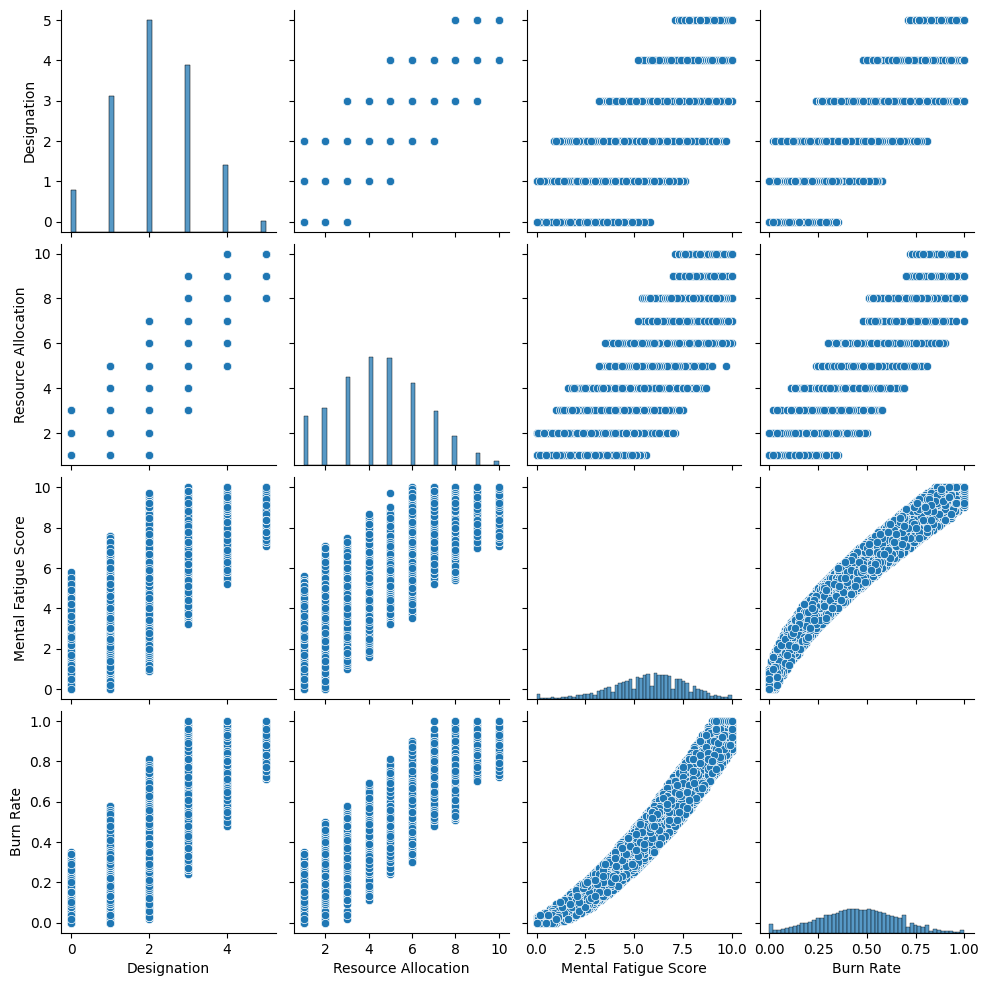

In [ ]:
sns.pairplot(data)
plt.show

In [ ]:
data=data.dropna()

In [ ]:
data.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [ ]:
data.shape

(18590, 9)

In [ ]:
data=data.drop(['Employee ID'],axis=1)

In [ ]:
data

Date of Joining  Gender Company Type WFH Setup Available  Designation  \
0           9/30/2008  Female      Service                  No            2   
1          11/30/2008    Male      Service                 Yes            1   
3           11/3/2008    Male      Service                 Yes            1   
4           7/24/2008  Female      Service                  No            3   
5          11/26/2008    Male      Product                 Yes            2   
...               ...     ...          ...                 ...          ...   
22743      12/15/2008  Female      Product                 Yes            1   
22744       5/27/2008    Male      Product                  No            3   
22746       1/19/2008  Female      Product                 Yes            3   
22748       1/10/2008  Female      Service                  No            2   
22749        1/6/2008    Male      Product                  No            3   

       Resource Allocation  Mental Fatigue Score  Burn Rate  
0                      3.0                   3.8       0.16  
1                      2.0                   5.0       0.36  
3                      1.0                   2.6       0.20  
4                      7.0                   6.9       0.52  
5                      4.0                   3.6       0.29  
...                    ...                   ...        ...  
22743                  3.0                   6.0       0.48  
22744                  7.0                   6.2       0.54  
22746                  6.0                   6.7       0.59  
22748                  5.0                   5.9       0.52  
22749                  6.0                   7.8       0.61  

[18590 rows x 8 columns]

In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Name: Burn Rate, dtype: float64

In [ ]:
data.shape

(18590, 8)

Min date 1/1/2008
Max date 9/9/2008


<Axes: xlabel='Month', ylabel='Hired employees'>

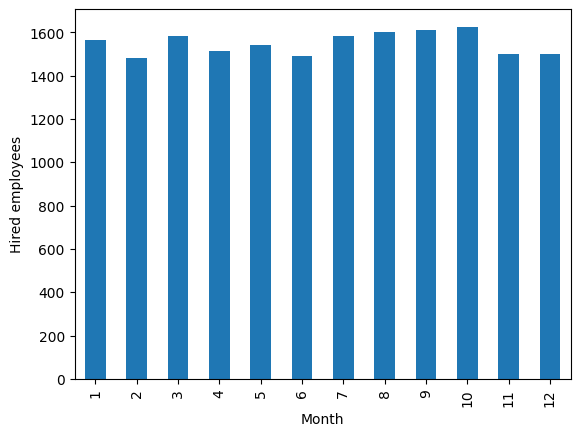

In [ ]:
print(f"Min date {data['Date of Joining'].min()}")
print(f"Max date {data['Date of Joining'].max()}")
data_month = data.copy()

data_month["Date of Joining"] = data_month['Date of Joining'].astype("datetime64[ns]")  # Specify time unit as nanoseconds
data_month["Date of Joining"].groupby(data_month['Date of Joining'].dt.month).count().plot(kind="bar", xlabel='Month', ylabel="Hired employees")

In [ ]:
data_2008 = pd.to_datetime(["2008-01-01"]*len(data))
# Specify time unit as nanoseconds when converting to datetime64
data["Days"] = data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days

0        273
1        334
3        307
4        205
5        330
        ... 
22743    349
22744    147
22746     18
22748      9
22749      5
Name: Days, Length: 18590, dtype: int64

In [ ]:
# Select only numeric columns before calculating correlation
numeric_data = data.select_dtypes(include=['number'])
correlation = numeric_data.corr()['Burn Rate']
print(correlation)


Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64


In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:]

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64

In [ ]:
data = data.drop(['Date of Joining','Days'], axis = 1)

In [ ]:
data.head()

Gender Company Type WFH Setup Available  Designation  Resource Allocation  \
0  Female      Service                  No            2                  3.0   
1    Male      Service                 Yes            1                  2.0   
3    Male      Service                 Yes            1                  1.0   
4  Female      Service                  No            3                  7.0   
5    Male      Product                 Yes            2                  4.0   

   Mental Fatigue Score  Burn Rate  
0                   3.8       0.16  
1                   5.0       0.36  
3                   2.6       0.20  
4                   6.9       0.52  
5                   3.6       0.29

In [ ]:
# Check if the columns exist before applying get_dummies
if all(col in data.columns for col in ['Company Type', 'WFH Setup Available', 'Gender']):
    data = pd.get_dummies(data, columns=['Company Type', 'WFH Setup Available','Gender'], drop_first=True)
    data.head()
    encoded_columns = data.columns
else:
    print("Error: One or more of the specified columns are not present in the DataFrame.")
    # Add debugging steps here to investigate why the columns are missing.
    # For example, print the existing columns:
    print(data.columns)




In [ ]:
data

Designation  Resource Allocation  Mental Fatigue Score  Burn Rate  \
0                2                  3.0                   3.8       0.16   
1                1                  2.0                   5.0       0.36   
3                1                  1.0                   2.6       0.20   
4                3                  7.0                   6.9       0.52   
5                2                  4.0                   3.6       0.29   
...            ...                  ...                   ...        ...   
22743            1                  3.0                   6.0       0.48   
22744            3                  7.0                   6.2       0.54   
22746            3                  6.0                   6.7       0.59   
22748            2                  5.0                   5.9       0.52   
22749            3                  6.0                   7.8       0.61   

       Company Type_Service  WFH Setup Available_Yes  Gender_Male  
0                      True                    False        False  
1                      True                     True         True  
3                      True                     True         True  
4                      True                    False        False  
5                     False                     True         True  
...                     ...                      ...          ...  
22743                 False                     True        False  
22744                 False                    False         True  
22746                 False                     True        False  
22748                  True                    False        False  
22749                 False                    False         True  

[18590 rows x 7 columns]

In [ ]:
y=data['Burn Rate']
x=data.drop(['Burn Rate'],axis=1)

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.7, shuffle=True,random_state=1)

scaler=StandardScaler()
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.transform(x_train),index=x_train.index,columns=x_train.columns)
x_test=pd.DataFrame(scaler.transform(x_test),index=x_test.index,columns=x_test.columns)


In [ ]:
x_train

Designation  Resource Allocation  Mental Fatigue Score  \
8977      0.723327             0.250185             -0.061773   
14115    -0.159330             0.250185             -0.941481   
8797      0.723327             0.250185              0.973179   
1173     -1.041987            -1.214568             -0.579248   
1941     -0.159330             0.738436              1.180169   
...            ...                  ...                   ...   
13453     0.723327             1.226687              1.645897   
21179     0.723327             0.250185             -1.044976   
6327      0.723327             0.250185              0.093470   
14933    -0.159330             0.250185              0.714441   
288      -0.159330             0.250185              1.076674   

       Company Type_Service  WFH Setup Available_Yes  Gender_Male  
8977               0.724706                -1.082297     1.051505  
14115              0.724706                -1.082297    -0.951018  
8797               0.724706                -1.082297    -0.951018  
1173              -1.379869                -1.082297    -0.951018  
1941              -1.379869                 0.923961     1.051505  
...                     ...                      ...          ...  
13453             -1.379869                 0.923961    -0.951018  
21179              0.724706                 0.923961     1.051505  
6327               0.724706                -1.082297     1.051505  
14933              0.724706                -1.082297     1.051505  
288               -1.379869                -1.082297    -0.951018  

[13013 rows x 6 columns]

In [ ]:
y_train

8977     0.41
14115    0.34
8797     0.61
1173     0.35
1941     0.61
         ... 
13453    0.78
21179    0.30
6327     0.42
14933    0.54
288      0.57
Name: Burn Rate, Length: 13013, dtype: float64

In [ ]:
linear_regression_model=LinearRegression()
linear_regression_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
print("Linear regression evaluation")

y_pred=linear_regression_model.predict(x_test)

mse= mean_squared_error(y_test,y_pred)
print("mean squared error:",mse)

rmse=mean_squared_error(y_test,y_pred,squared=False)
print("root mean squared error:",rmse)

mae=mean_absolute_error(y_test,y_pred)
print("mean absolute error:",mae)

r2=r2_score(y_test,y_pred)
print("r2 score:",r2)

Linear regression evaluation
mean squared error: 0.0031569779113610717
root mean squared error: 0.0561869905882231
mean absolute error: 0.04595032032644773
r2 score: 0.918822674247248


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Multi-layer Perceptron Regressor": MLPRegressor(),
    "Linear Support Vector Regressor": LinearSVR(),
    "Support Vector Regressor": SVR(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": XGBRegressor(),  # Assuming XGBoost is installed
    "LightGBM Regressor": LGBMRegressor(),  # Assuming LightGBM is installed
    "CatBoost Regressor": CatBoostRegressor()  # Assuming CatBoost is installed
}

Training Linear Regression...
Linear Regression evaluation:
Mean Squared Error: 0.0031569779113610717
Root Mean Squared Error: 0.0561869905882231
Mean Absolute Error: 0.04595032032644773
R2 Score: 0.918822674247248
------------------------------


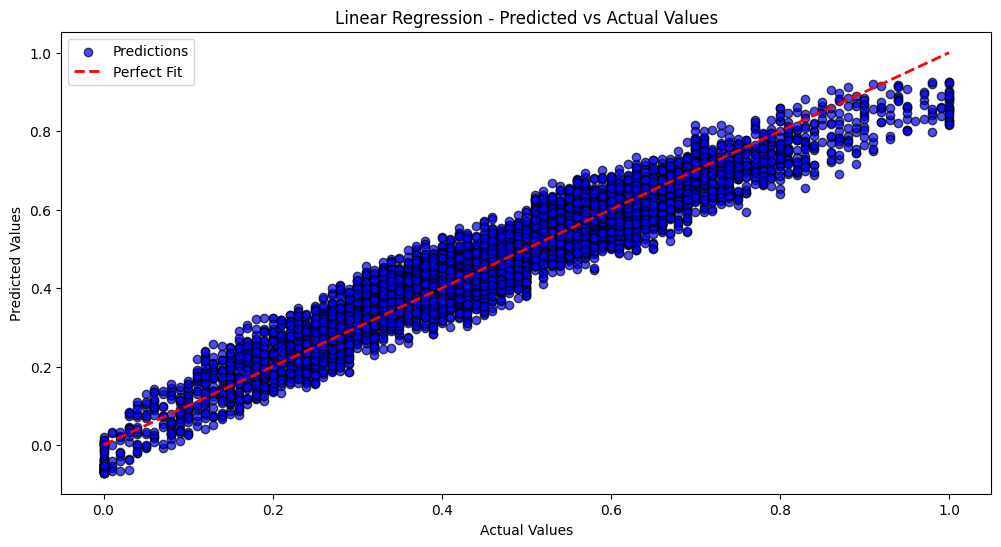

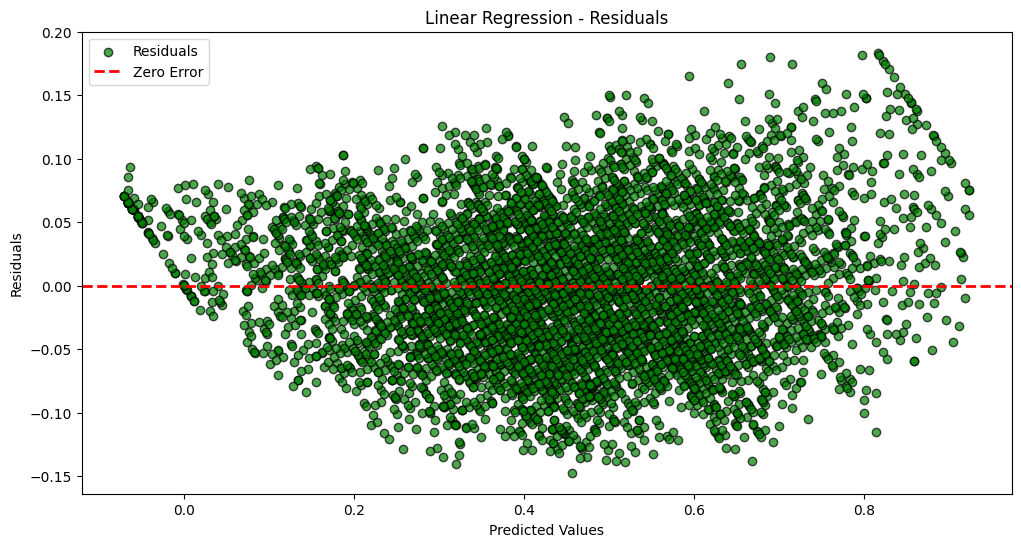

Training Ridge Regression...
Ridge Regression evaluation:
Mean Squared Error: 0.00315701028770277
Root Mean Squared Error: 0.05618727869992255
Mean Absolute Error: 0.04594967269168724
R2 Score: 0.9188218417343479
------------------------------


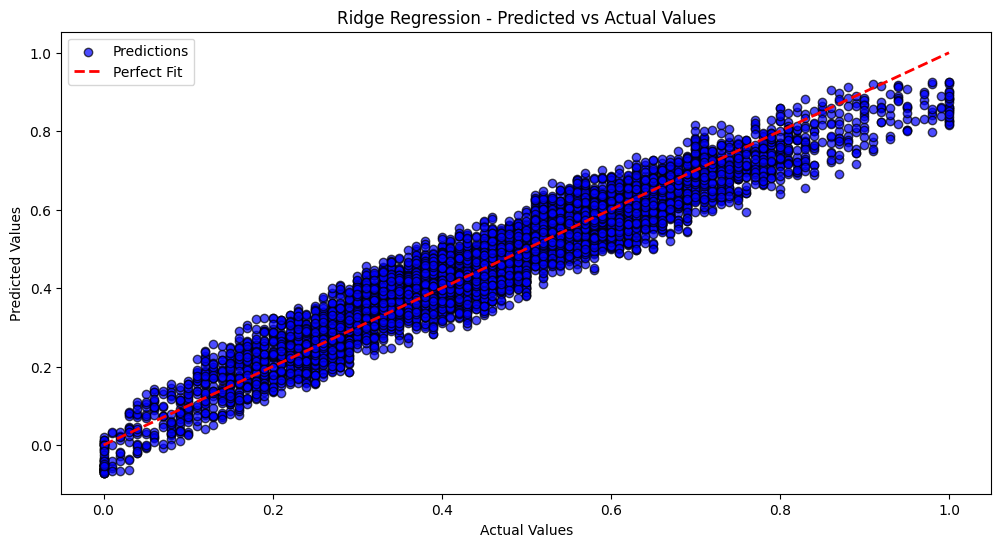

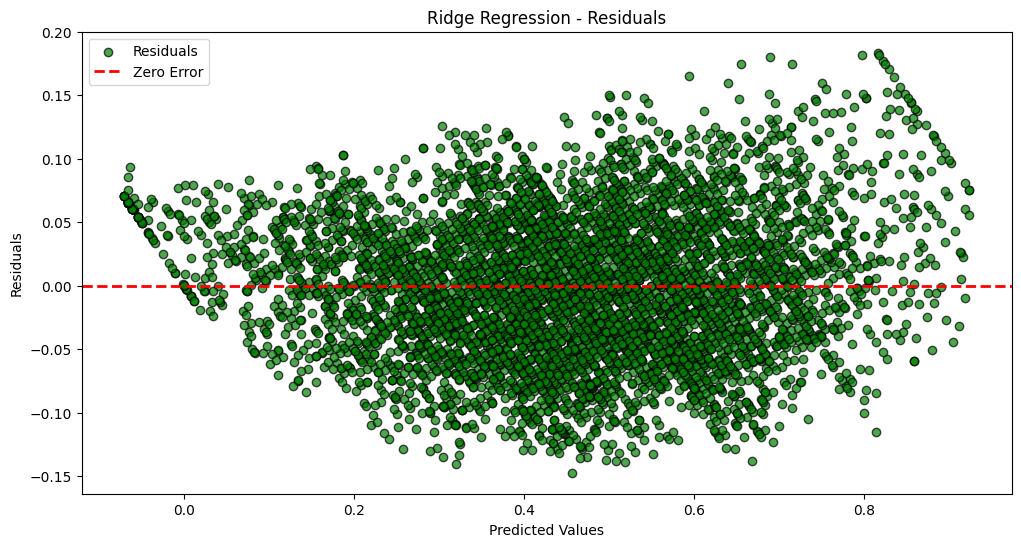

Training Lasso Regression...
Lasso Regression evaluation:
Mean Squared Error: 0.038893980509103844
Root Mean Squared Error: 0.19721556862759046
Mean Absolute Error: 0.15852900192867916
R2 Score: -0.00010497832323919098
------------------------------


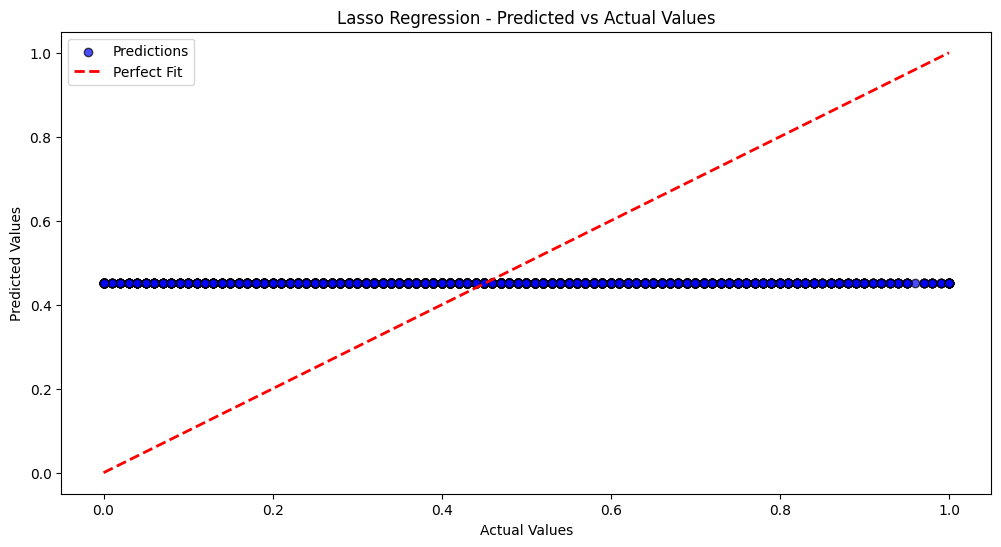

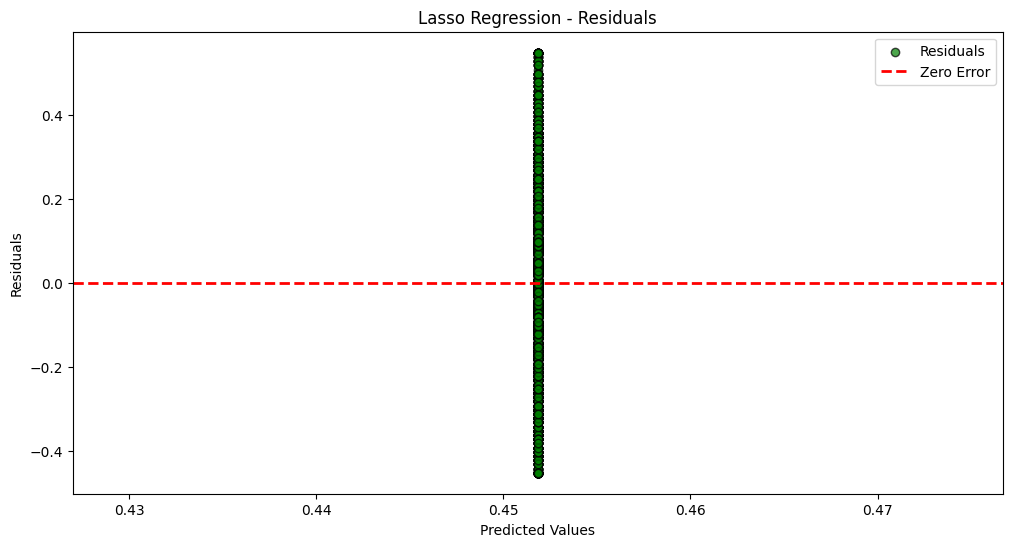

Training K-Neighbors Regressor...
K-Neighbors Regressor evaluation:
Mean Squared Error: 0.00338130966469428
Root Mean Squared Error: 0.05814902978291452
Mean Absolute Error: 0.04616496324188633
R2 Score: 0.9130542931155712
------------------------------


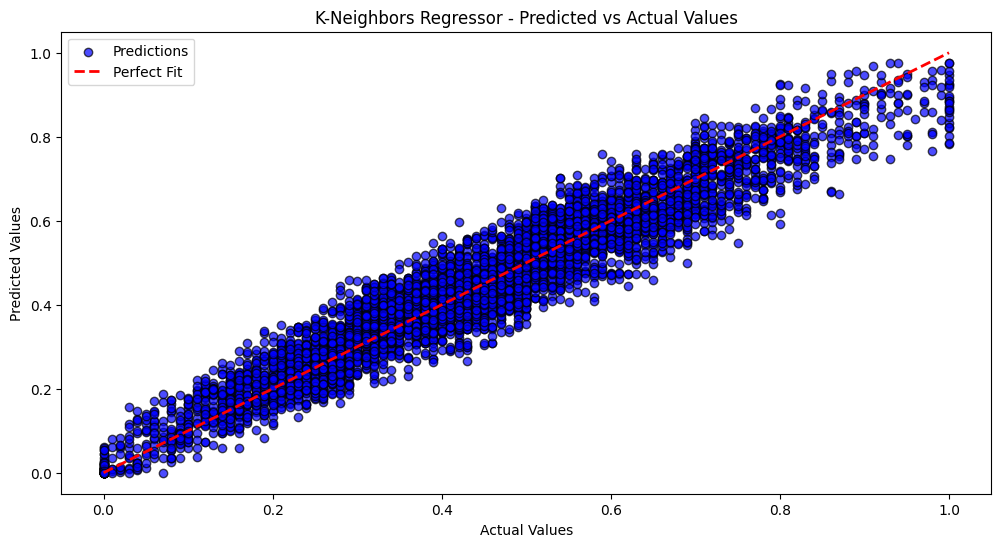

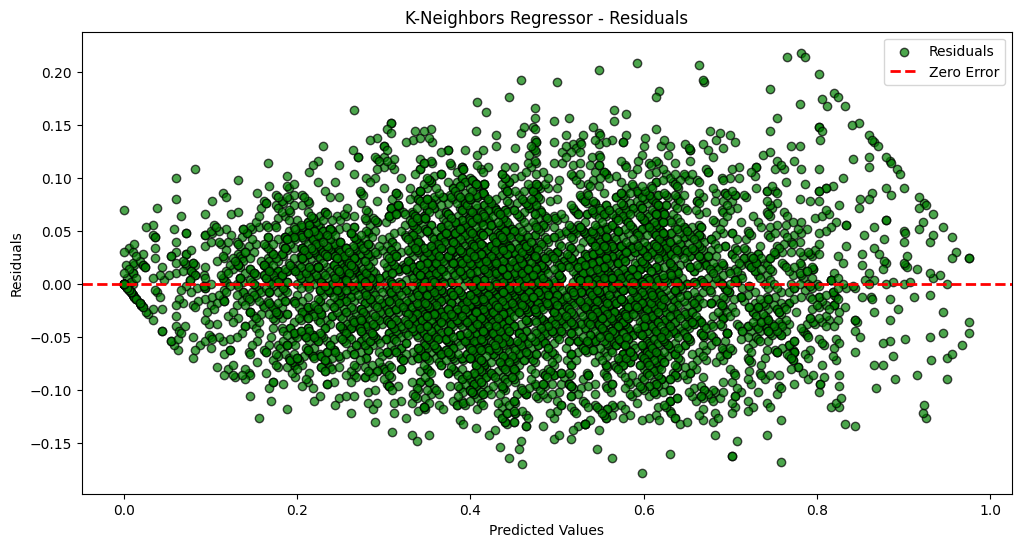

Training Multi-layer Perceptron Regressor...
Multi-layer Perceptron Regressor evaluation:
Mean Squared Error: 0.0030824040467863426
Root Mean Squared Error: 0.055519402435422
Mean Absolute Error: 0.045344884724177165
R2 Score: 0.9207402381539953
------------------------------


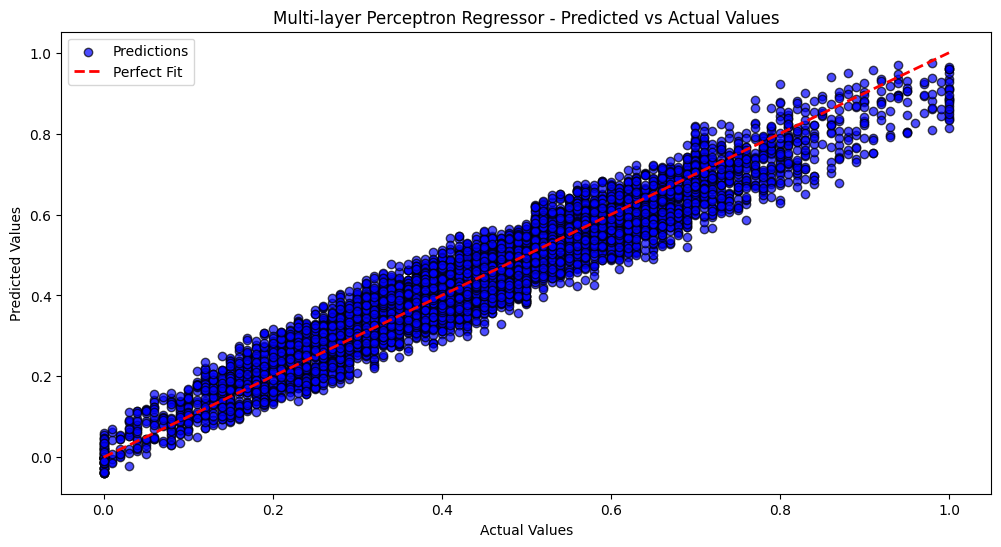

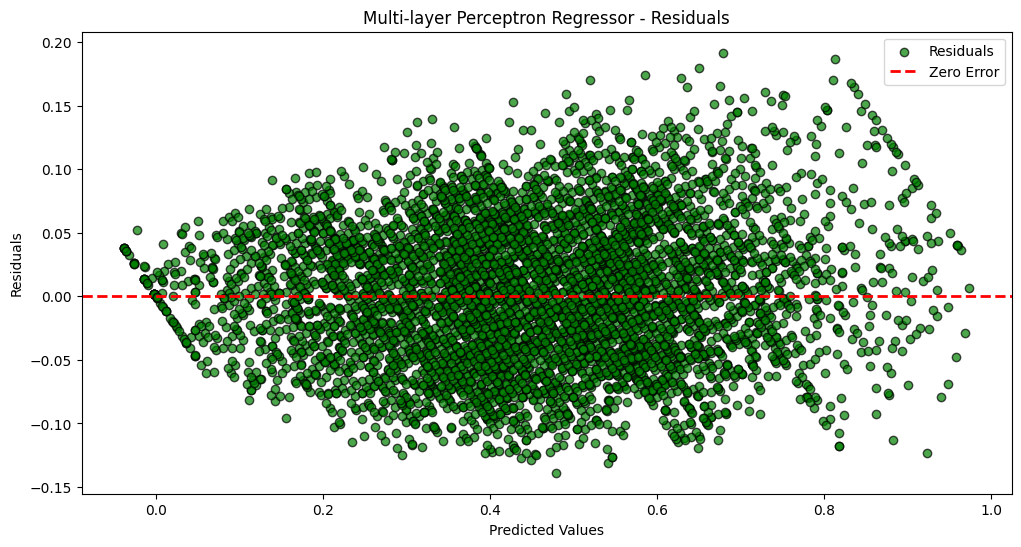

Training Linear Support Vector Regressor...
Linear Support Vector Regressor evaluation:
Mean Squared Error: 0.0032801373632614984
Root Mean Squared Error: 0.057272483473841944
Mean Absolute Error: 0.04621809146306521
R2 Score: 0.9156557990814534
------------------------------


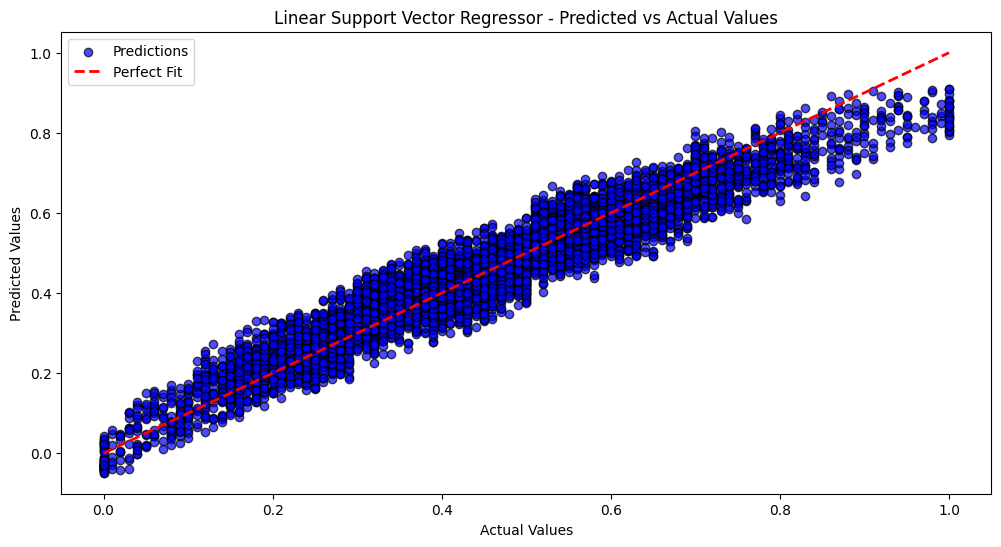

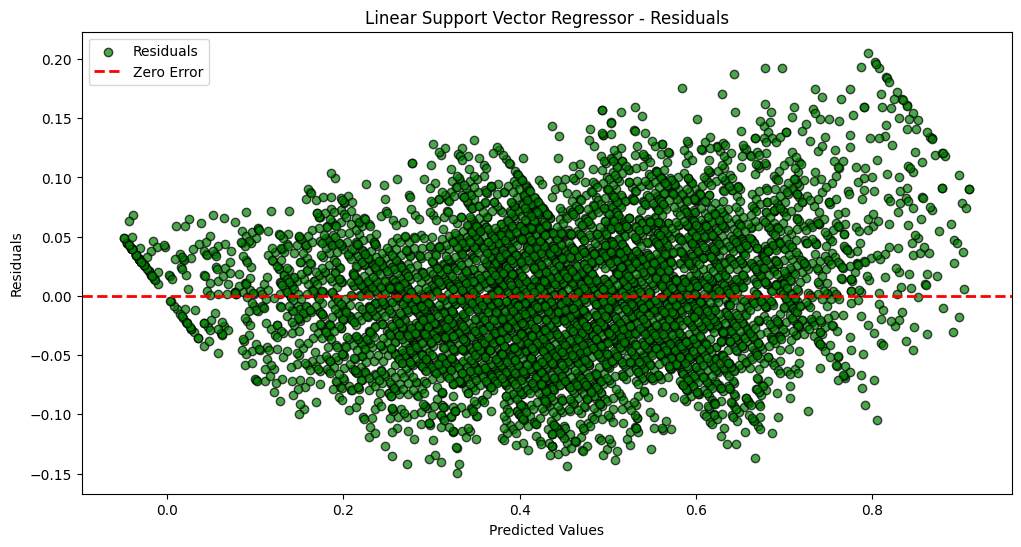

Training Support Vector Regressor...
Support Vector Regressor evaluation:
Mean Squared Error: 0.00341204574122986
Root Mean Squared Error: 0.058412719002199
Mean Absolute Error: 0.04962241383880883
R2 Score: 0.9122639573681112
------------------------------


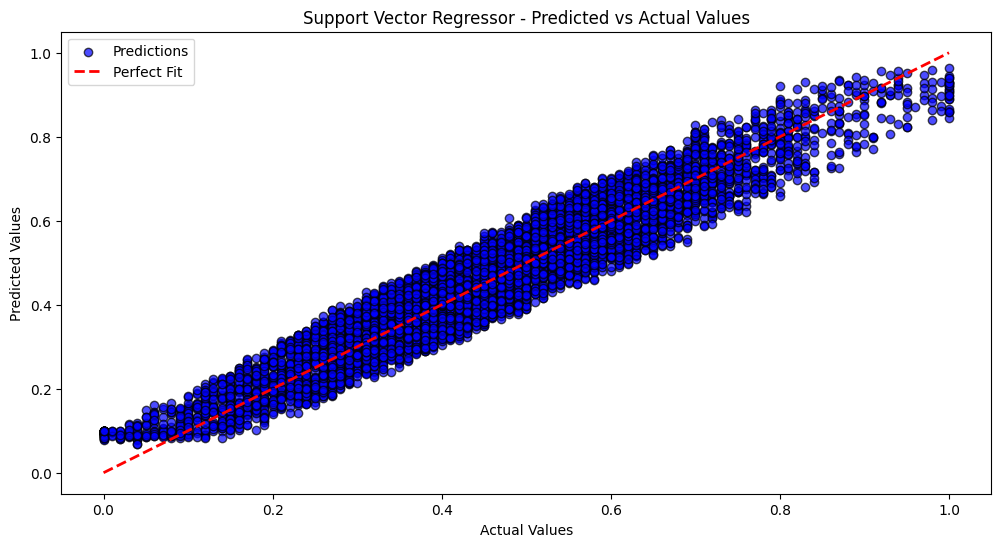

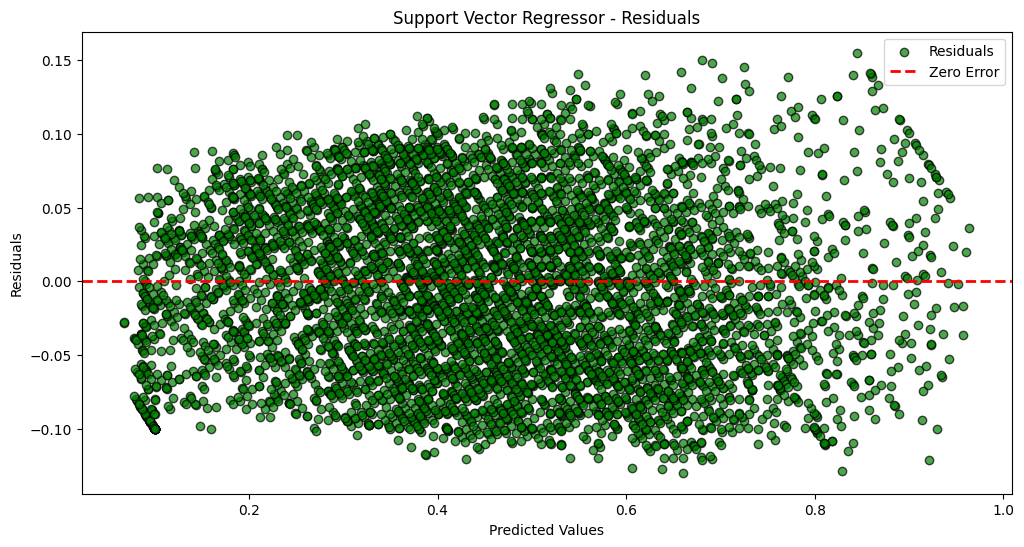

Training Decision Tree Regressor...
Decision Tree Regressor evaluation:
Mean Squared Error: 0.0038655219986949755
Root Mean Squared Error: 0.0621733222427029
Mean Absolute Error: 0.048368342442603594
R2 Score: 0.9006034418665904
------------------------------


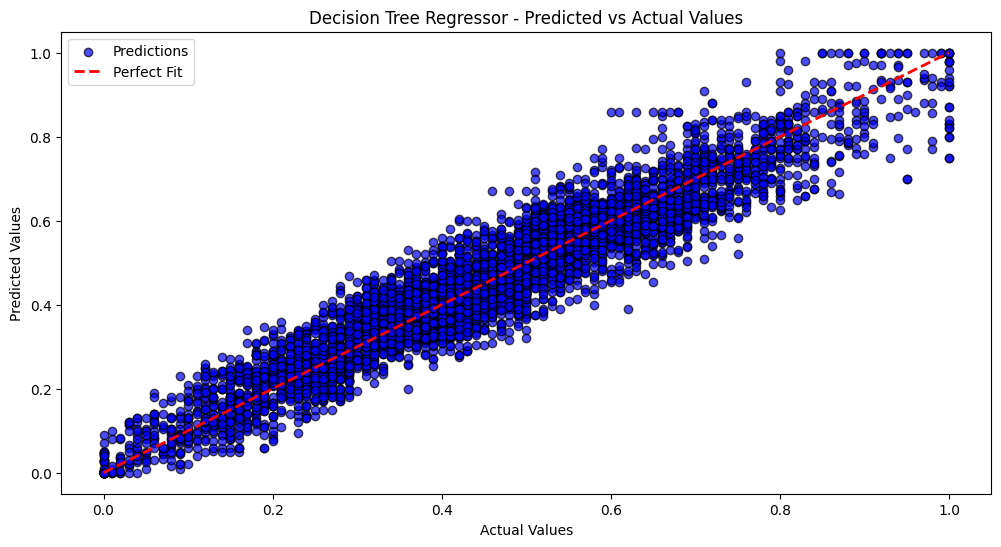

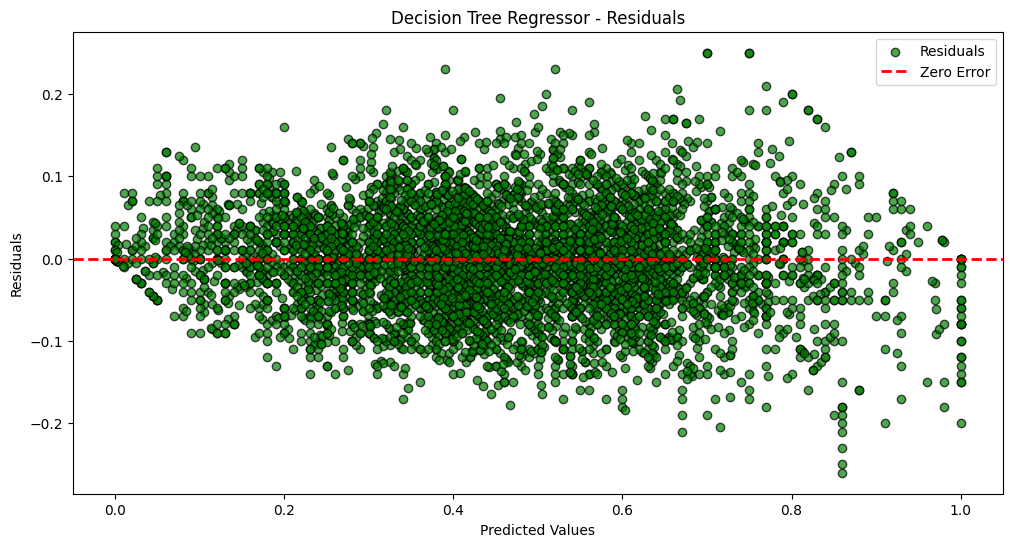

Training Random Forest Regressor...
Random Forest Regressor evaluation:
Mean Squared Error: 0.003388930118939184
Root Mean Squared Error: 0.05821451811137136
Mean Absolute Error: 0.04594811811252787
R2 Score: 0.9128583436620141
------------------------------


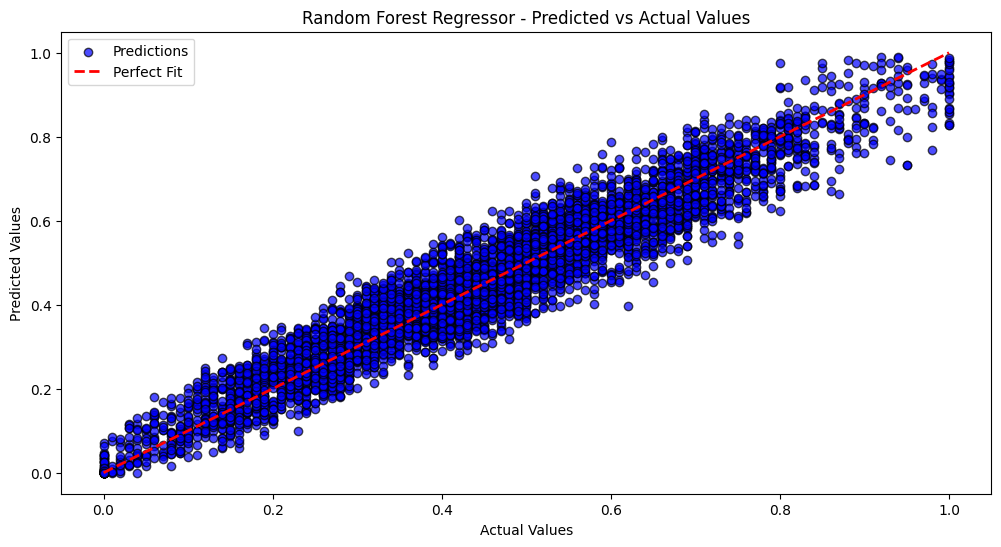

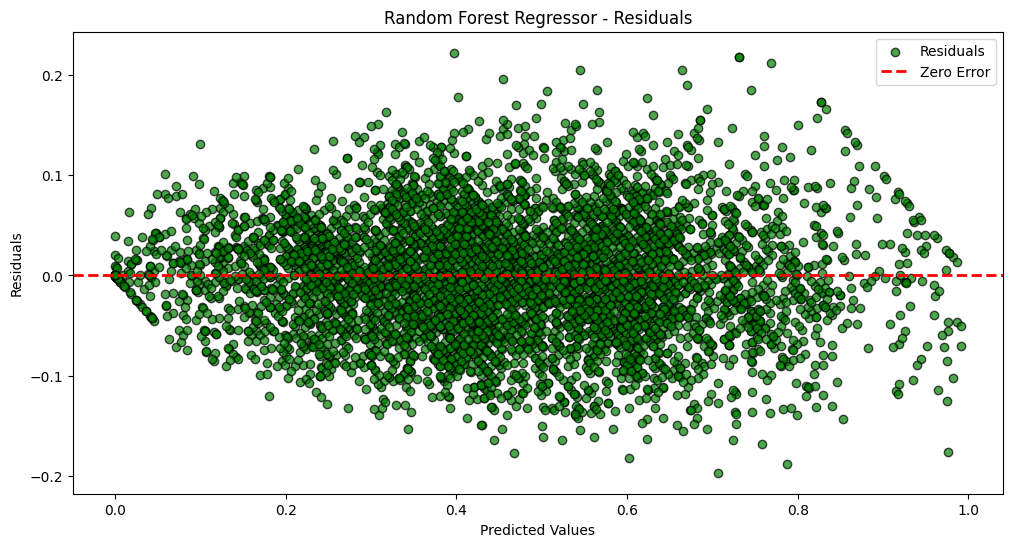

Training Gradient Boosting Regressor...
Gradient Boosting Regressor evaluation:
Mean Squared Error: 0.002867137073780686
Root Mean Squared Error: 0.05354565410731935
Mean Absolute Error: 0.04376889421019168
R2 Score: 0.9262755309821783
------------------------------


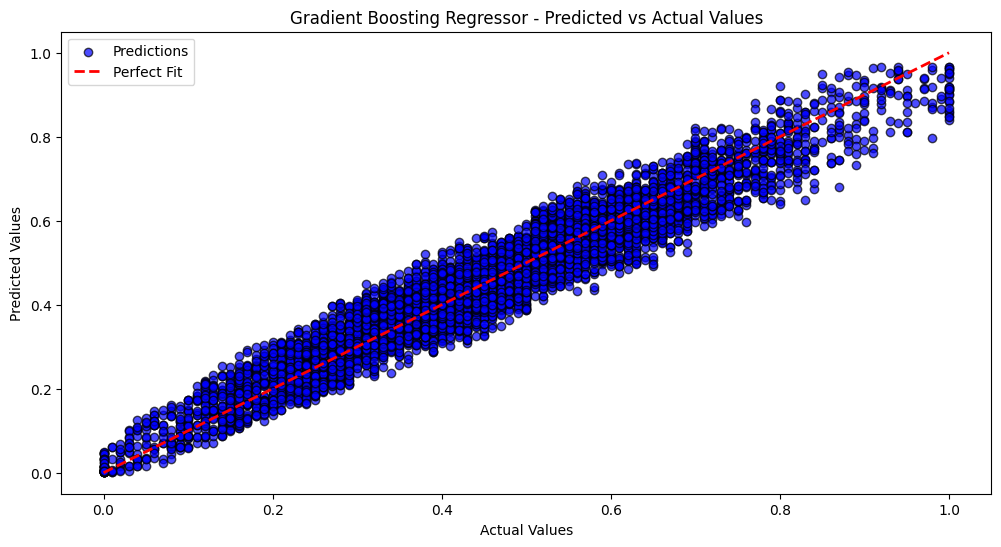

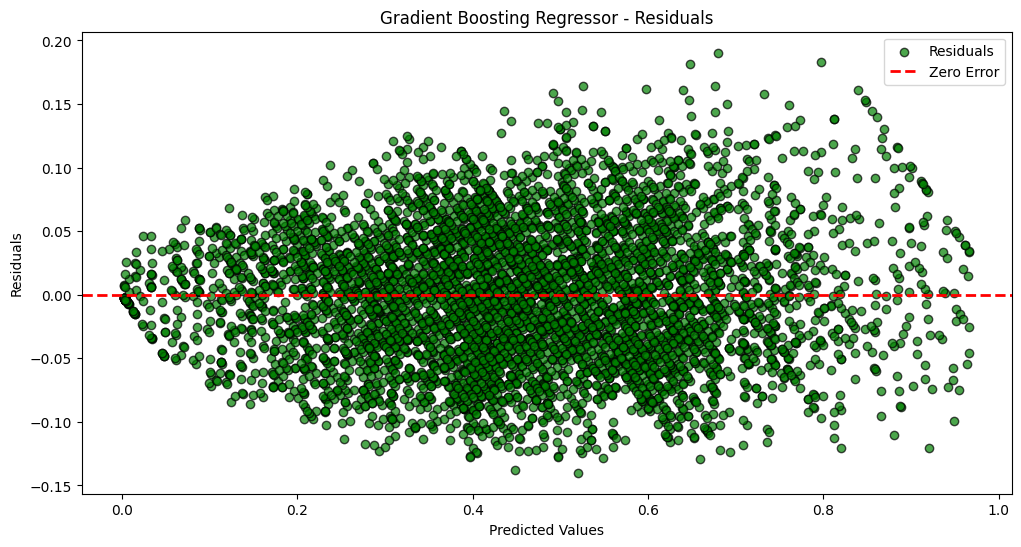

Training XGBoost Regressor...
XGBoost Regressor evaluation:
Mean Squared Error: 0.002927899061959848
Root Mean Squared Error: 0.0541100643315072
Mean Absolute Error: 0.04344031691115919
R2 Score: 0.9247131203963918
------------------------------


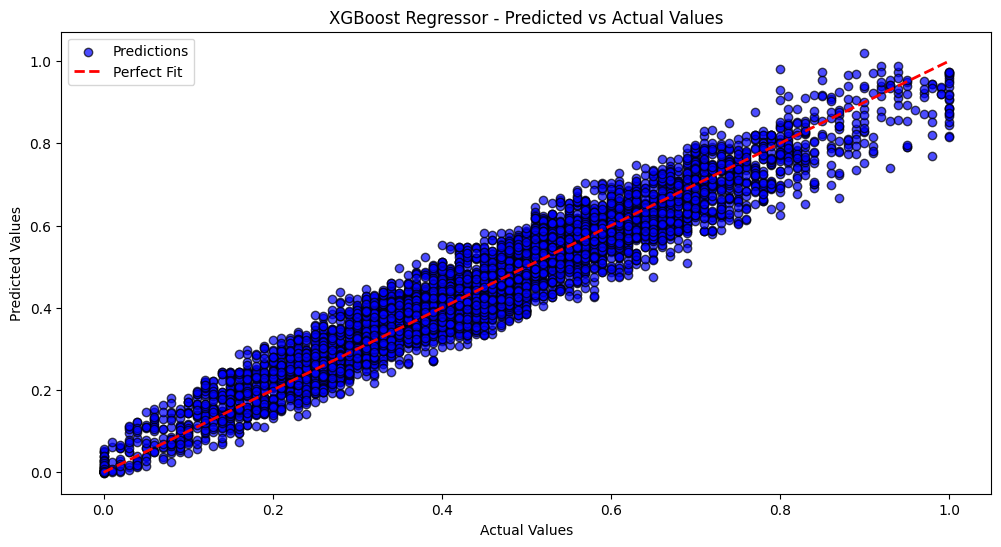

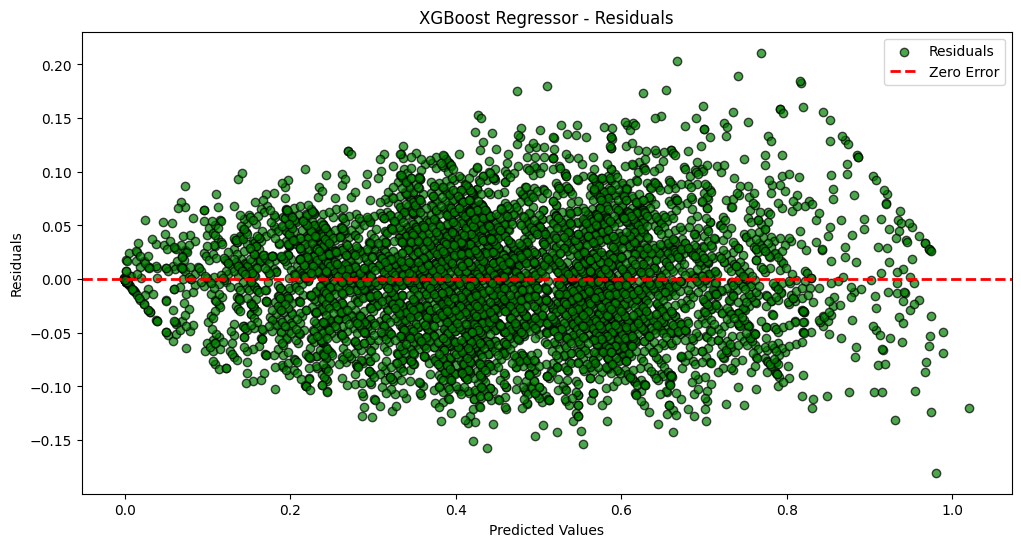

Training LightGBM Regressor...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 13013, number of used features: 6
[LightGBM] [Info] Start training from score 0.451838
LightGBM Regressor evaluation:
Mean Squared Error: 0.002818199335582036
Root Mean Squared Error: 0.053086715245737666
Mean Absolute Error: 0.04297190446259326
R2 Score: 0.9275338973144412
------------------------------


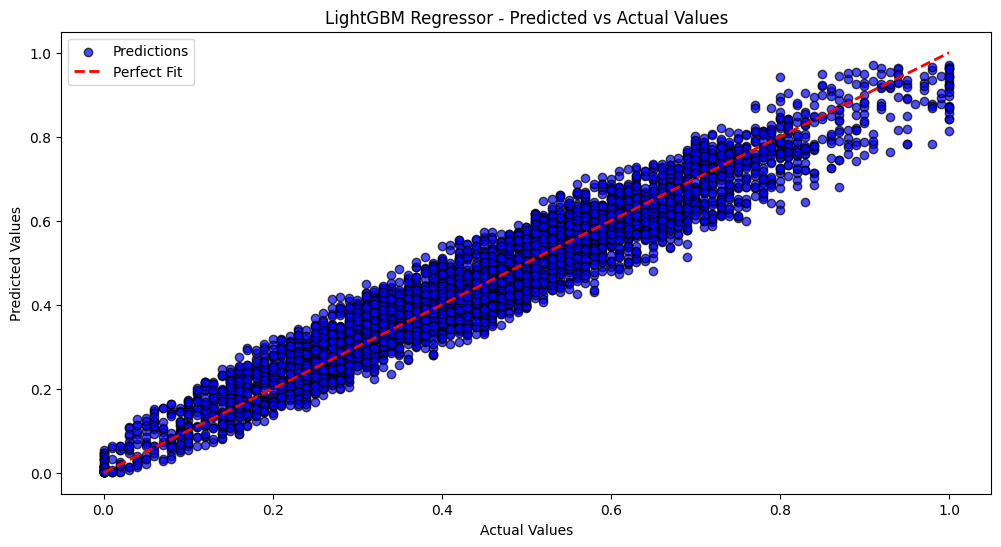

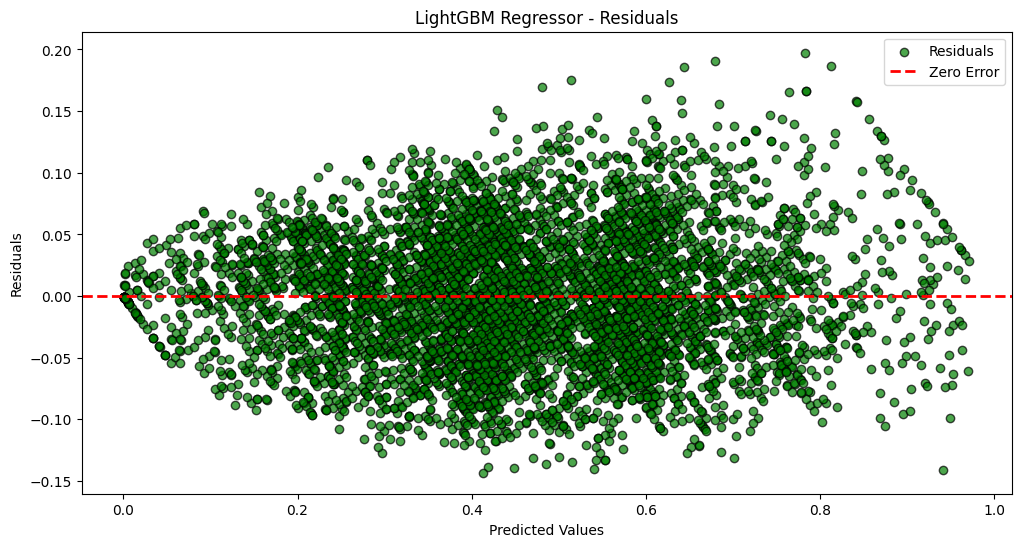

Training CatBoost Regressor...
Learning rate set to 0.061412
0:	learn: 0.1878842	total: 5.5ms	remaining: 5.5s
1:	learn: 0.1782220	total: 13ms	remaining: 6.49s
2:	learn: 0.1695528	total: 16.6ms	remaining: 5.52s
3:	learn: 0.1611370	total: 21.4ms	remaining: 5.32s
4:	learn: 0.1531750	total: 26ms	remaining: 5.18s
5:	learn: 0.1460355	total: 29.5ms	remaining: 4.89s
6:	learn: 0.1391178	total: 35.6ms	remaining: 5.05s
7:	learn: 0.1326525	total: 39ms	remaining: 4.83s
8:	learn: 0.1265836	total: 43.9ms	remaining: 4.84s
9:	learn: 0.1208871	total: 47.4ms	remaining: 4.7s
10:	learn: 0.1155820	total: 51.1ms	remaining: 4.59s
11:	learn: 0.1107073	total: 54.2ms	remaining: 4.46s
12:	learn: 0.1060481	total: 59.9ms	remaining: 4.54s
13:	learn: 0.1017786	total: 65.7ms	remaining: 4.63s
14:	learn: 0.0978251	total: 73.5ms	remaining: 4.82s
15:	learn: 0.0941963	total: 77.4ms	remaining: 4.76s
16:	learn: 0.0908435	total: 84.1ms	remaining: 4.86s
17:	learn: 0.0875632	total: 90.3ms	remaining: 4.93s
18:	learn: 0.0846171	t

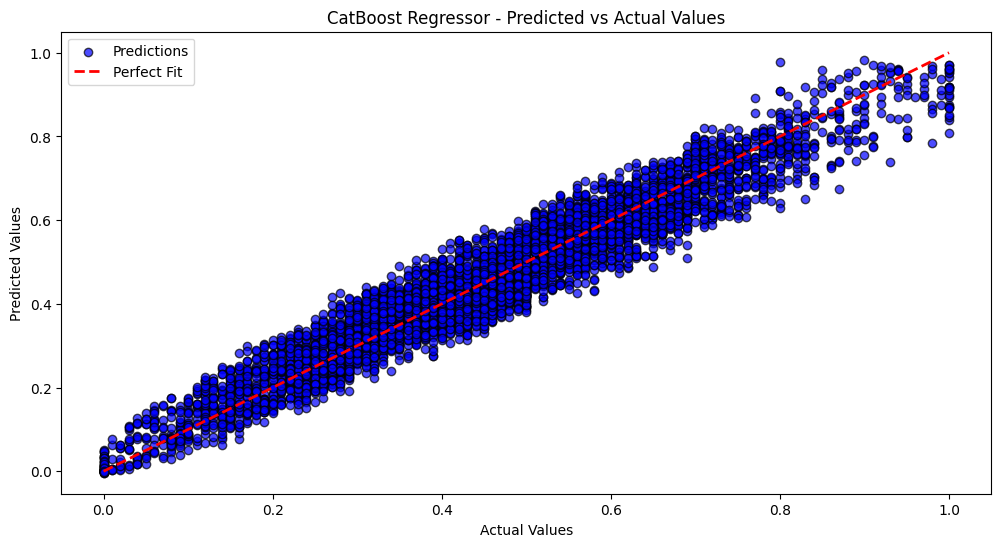

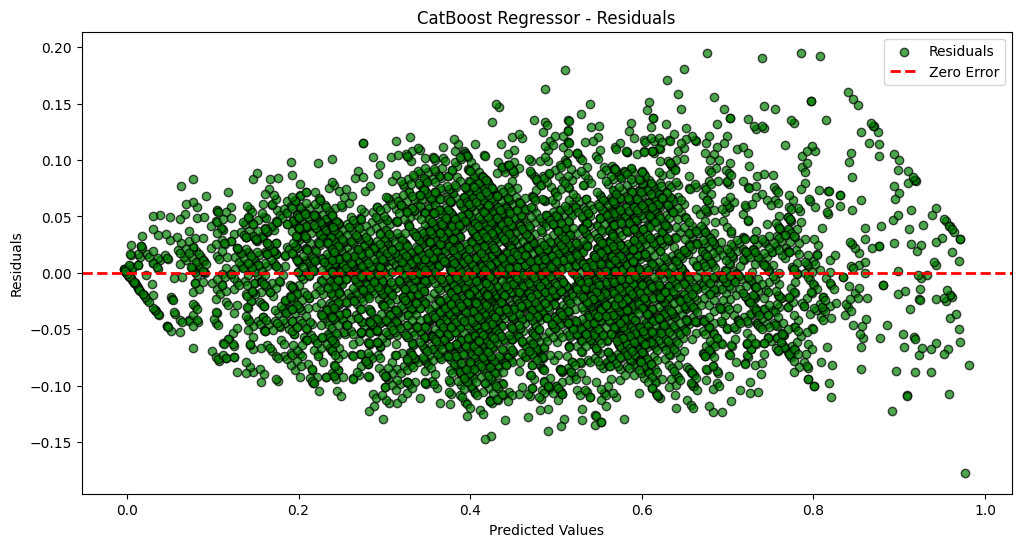

In [ ]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} evaluation:")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R2 Score: {r2}")
    print("-" * 30)


    # Plotting predicted vs actual values
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, y_pred, edgecolors='k', alpha=0.7, label='Predictions', color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{name} - Predicted vs Actual Values')
    plt.legend()
    plt.show()

    # Plotting residuals
    plt.figure(figsize=(12, 6))
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, edgecolors='k', alpha=0.7, label='Residuals', color='green')
    plt.axhline(y=0, color='red', linestyle='--', lw=2, label='Zero Error')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{name} - Residuals')
    plt.legend()
    plt.show()